In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Ames_housing_outliers_removed.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# open, read and then close a file in python
with open('../../../references/exercise/DATA/Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
df = df.drop('PID', axis = 1)

In [6]:
len(df)

2927

In [7]:
def miss_percent(df):
    percent = 100*(df.isnull().sum()/len(df))
    percent = percent[percent > 0].sort_values()
    return percent

In [8]:
missing = miss_percent(df)

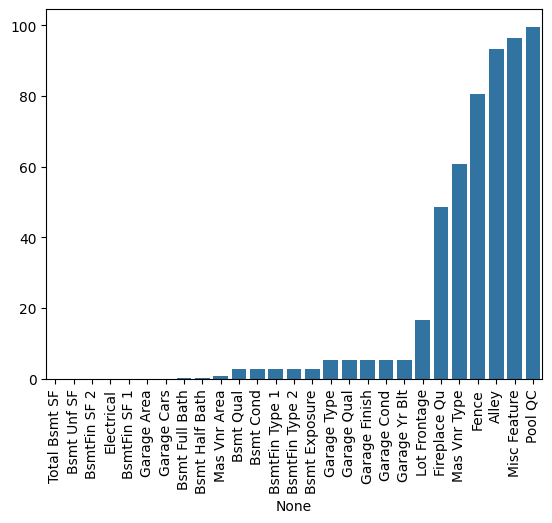

In [9]:
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation = 90);

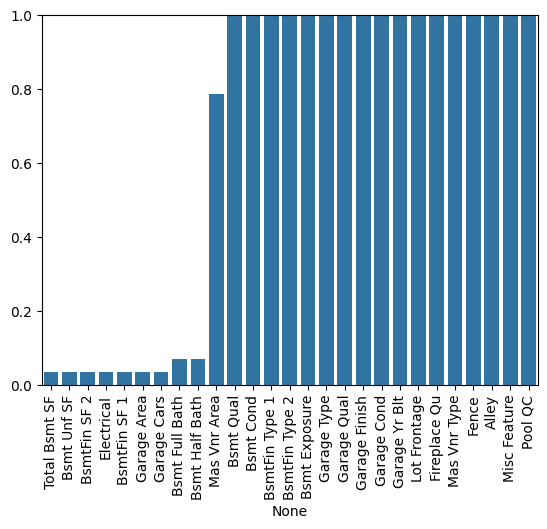

In [10]:
## missing less than one percent of data
# I'm assuming that less than one percent of missing data is resonable to drop the rows
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation = 90);
plt.ylim(0,1);

- It is normal to consider dropping the rows if the missing data is around 1-2 percent of the dataset
- If the missing percentage is extremely high we can think about dropping the feature too.

In [11]:
missing[missing<1]

Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [12]:
df[df['Bsmt Unf SF'].isnull()]['Garage Area']

1341    280.0
Name: Garage Area, dtype: float64

In [13]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [14]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Area'])

In [15]:
missing = miss_percent(df)

In [16]:
missing[missing<1]

Total Bsmt SF     0.034188
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

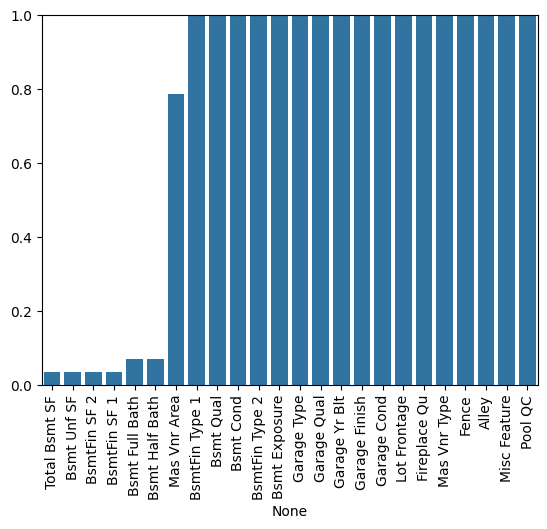

In [17]:
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation = 90);
plt.ylim(0,1);

In [18]:
# rows with `Bsmt Full Bath` having NaN
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [19]:
# checking if `Bsmt Full Bath` and `Bsmt Half Bath` share a common rows having null values
df[df['Bsmt Full Bath'].isnull()]['Bsmt Half Bath']

1341   NaN
1497   NaN
Name: Bsmt Half Bath, dtype: float64

In [20]:
# Check if other features like `Bsmt Unf SF` have only one row missing, 
# does it share common row with `Bsmt Full Bath` 
df[df['Bsmt Full Bath'].isnull()]['Bsmt Unf SF']

1341    NaN
1497    0.0
Name: Bsmt Unf SF, dtype: float64

- All the features with Bsmt substring are actually the factors describing the basement of a house
- and the `NaN` in those numeric features actually refers the house has no basement.
- and the non-numeric are the strings describing the basement in category, so if `NaN` -> no basement
- Such values can be replaced with zero (0) in numeric features 

In [21]:
'Bsmt' in df.columns

False

In [22]:
basement_features = []
for el in df.columns:
    if('Bsmt' in el):
       basement_features.append(el) 

In [23]:
basement_features

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [24]:
basement_numeric = df[basement_features].select_dtypes(include = np.number)

In [25]:
# numeric basement features
basement_numeric = basement_numeric.columns

In [26]:
# non-numeric basement features
basement_string = list(set(basement_features) - set(basement_numeric))

- for basement features with numeric data, lets fillna(0) -> replacing NaN with 0
- for basement features eith string data, lets fillna('None') -> replace NaN with 'None'

In [27]:
df[basement_numeric] = df[basement_numeric].fillna(0)
df[basement_string] = df[basement_string].fillna('None')

In [28]:
# lets check if we filled the values that were previously missing
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [29]:
missing = miss_percent(df)

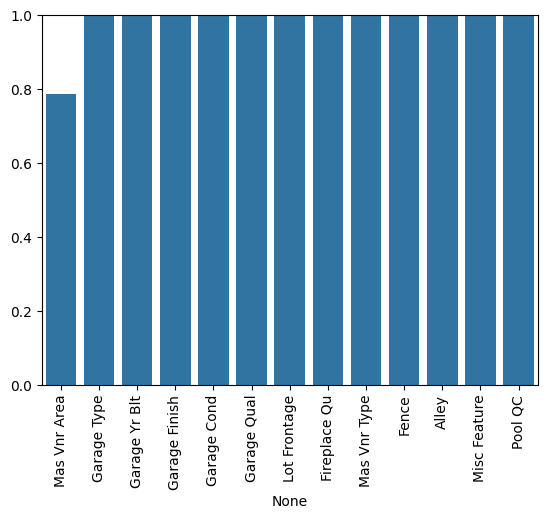

In [30]:
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation = 90);
plt.ylim(0,1);

In [31]:
missing

Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Cond       5.401709
Garage Qual       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Mas Vnr Type     60.615385
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

- Similarly, `Mas Vnr Area` and `Mas Vnr Type` are the Masonary Veneer Area and type
- where area is the numeric features that contains Masonary Veneer Area in sq. feet

In [32]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [33]:
df[df['Mas Vnr Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [34]:
df[df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2922,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [35]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')